<a href="https://colab.research.google.com/github/Anshikkaa17/CODETECH-INTERNSHIP/blob/main/forecast_results_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('PJM_Load_hourly.csv')
df.head()


Saving pjm_hourly_est.csv to pjm_hourly_est.csv
Saving AEP_hourly.csv to AEP_hourly.csv
Saving COMED_hourly.csv to COMED_hourly.csv
Saving DAYTON_hourly.csv to DAYTON_hourly.csv
Saving DEOK_hourly.csv to DEOK_hourly.csv
Saving DOM_hourly.csv to DOM_hourly.csv
Saving DUQ_hourly.csv to DUQ_hourly.csv
Saving EKPC_hourly.csv to EKPC_hourly.csv
Saving est_hourly.paruqet to est_hourly.paruqet
Saving FE_hourly.csv to FE_hourly.csv
Saving NI_hourly.csv to NI_hourly.csv
Saving PJM_Load_hourly.csv to PJM_Load_hourly.csv
Saving PJME_hourly.csv to PJME_hourly.csv
Saving PJMW_hourly.csv to PJMW_hourly.csv


,Datetime,PJM_Load_MW
0,1998-12-31 01:00:00,29309.0
1,1998-12-31 02:00:00,28236.0
2,1998-12-31 03:00:00,27692.0
3,1998-12-31 04:00:00,27596.0
4,1998-12-31 05:00:00,27888.0


In [4]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)
df = df.resample('D').mean()
df.dropna(inplace=True)
df.head()


,PJM_Load_MW
Datetime,
1998-04-01,27813.739130
1998-04-02,26605.791667
1998-04-03,25672.333333
1998-04-04,24487.083333
1998-04-05,23487.565217


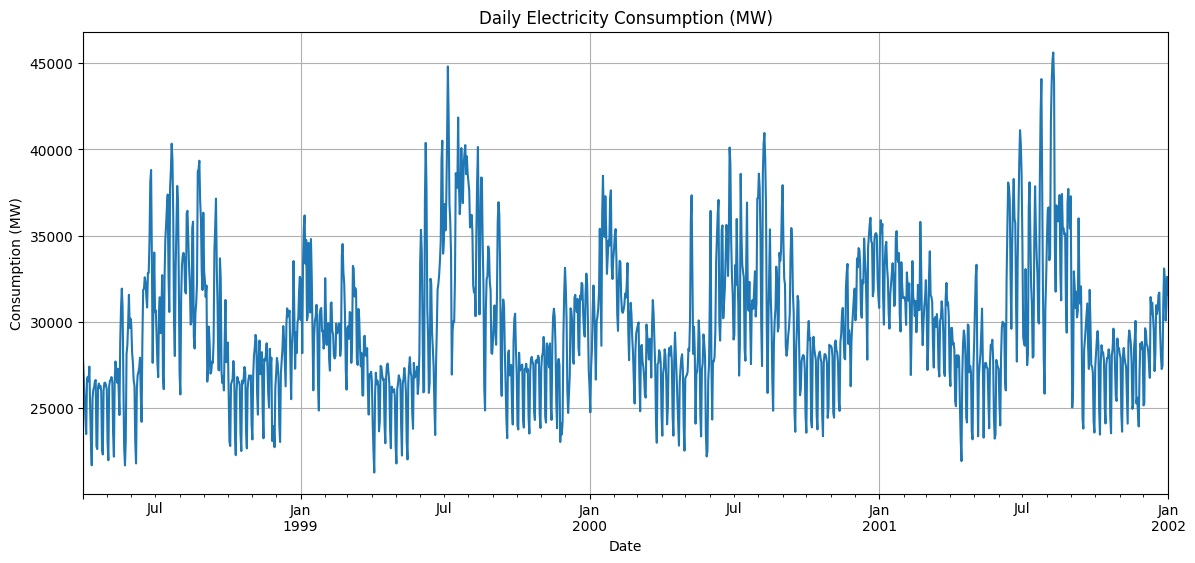

In [6]:
plt.figure(figsize=(14, 6))
df['PJM_Load_MW'].plot()
plt.title("Daily Electricity Consumption (MW)")
plt.xlabel("Date")
plt.ylabel("Consumption (MW)")
plt.grid(True)
plt.show()

In [8]:
df['Target'] = df['PJM_Load_MW'].shift(-1)  # Predict next day’s load
df.dropna(inplace=True)

In [13]:
split_date = '2001-01-01'
train = df[:split_date]
test = df[split_date:]

X_train = train[['PJM_Load_MW']]
y_train = train['Target']

X_test = test[['PJM_Load_MW']]
y_test = test['Target']

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

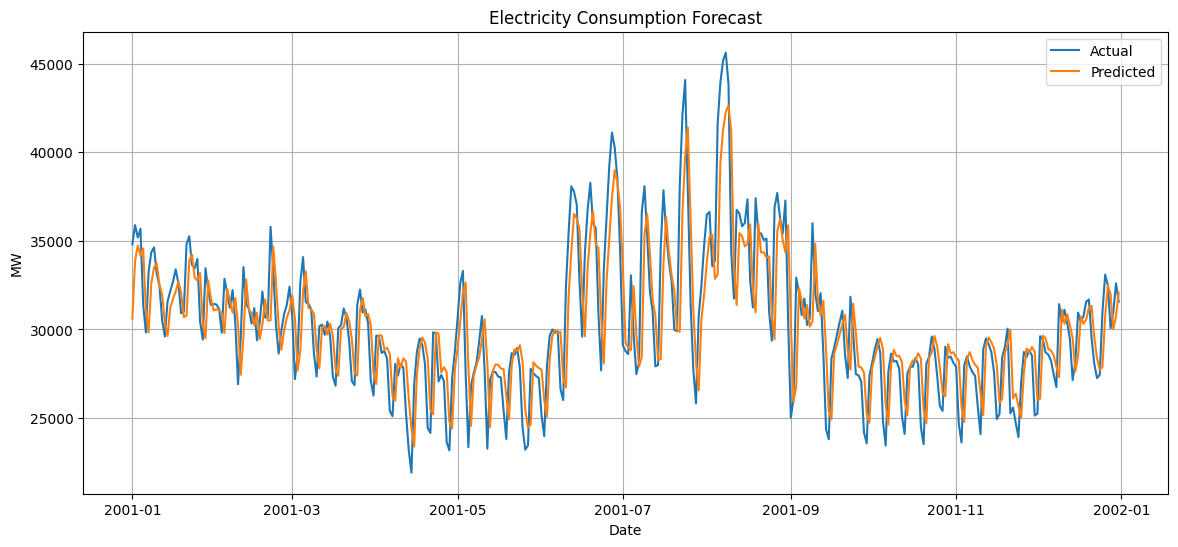

R² Score: 0.6392865623270823
RMSE: 2427.696299852033


In [14]:
y_pred = model.predict(X_test)

plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('Electricity Consumption Forecast')
plt.xlabel('Date')
plt.ylabel('MW')
plt.legend()
plt.grid(True)
plt.show()

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


In [15]:
!pip install statsmodels

import statsmodels.api as sm


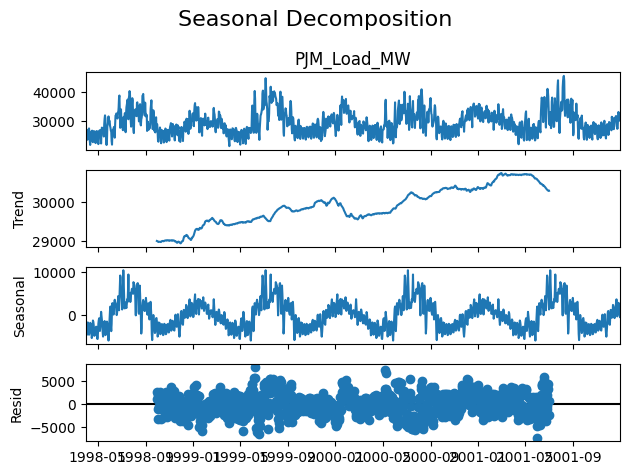

In [17]:
decomposition = sm.tsa.seasonal_decompose(df['PJM_Load_MW'], model='additive', period=365)
decomposition.plot()
plt.suptitle("Seasonal Decomposition", fontsize=16)
plt.tight_layout()
plt.show()

In [18]:
from statsmodels.tsa.arima.model import ARIMA


In [20]:
model_arima = ARIMA(df['PJM_Load_MW'], order=(5,1,0))  # p,d,q
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            PJM_Load_MW   No. Observations:                 1371
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -12393.081
Date:                Tue, 05 Aug 2025   AIC                          24798.161
Time:                        16:05:15   BIC                          24829.497
Sample:                    04-01-1998   HQIC                         24809.888
                         - 12-31-2001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0085      0.021     -0.398      0.691      -0.050       0.033
ar.L2         -0.4352      0.018    -24.666      0.000      -0.470      -0.401
ar.L3         -0.2195      0.023     -9.548      0.0

In [21]:
!pip install prophet
from prophet import Prophet


In [23]:
df_prophet = df.reset_index()[['Datetime', 'PJM_Load_MW']]
df_prophet.columns = ['ds', 'y']

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcgu8kbdg/ffbpjz9t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcgu8kbdg/obyoxzk_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24442', 'data', 'file=/tmp/tmpcgu8kbdg/ffbpjz9t.json', 'init=/tmp/tmpcgu8kbdg/obyoxzk_.json', 'output', 'file=/tmp/tmpcgu8kbdg/prophet_model8uf390jd/prophet_model-20250805160635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:06:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:06:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


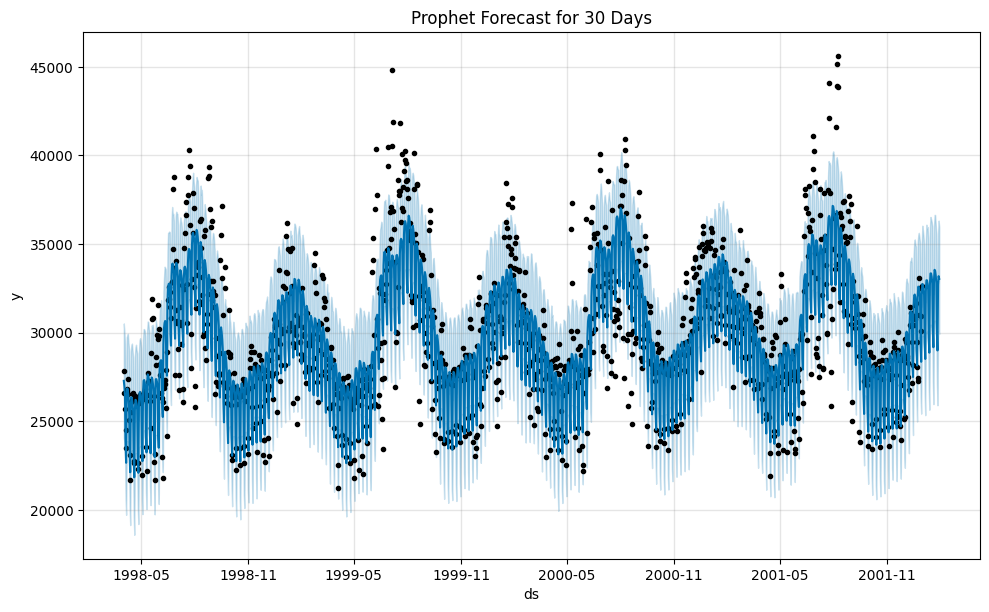

In [24]:
model_prophet = Prophet()
model_prophet.fit(df_prophet)

future = model_prophet.make_future_dataframe(periods=30)
forecast = model_prophet.predict(future)

# Plot
model_prophet.plot(forecast)
plt.title("Prophet Forecast for 30 Days")
plt.show()


In [25]:
output = pd.DataFrame({'Date': y_test.index, 'Actual': y_test, 'Predicted': y_pred})
output.to_csv('forecast_results.csv', index=False)
from google.colab import files
files.download('forecast_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>